<a href="https://colab.research.google.com/github/kyle1213/2022S-ML/blob/main/HW3_201920723_%EA%B9%80%EB%8F%99%EC%9A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
path = './drive/MyDrive/Colab Notebooks/heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [5]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



[0.7323943661971831, 0.7323943661971831, 0.7323943661971831, 0.676056338028169, 0.676056338028169, 0.647887323943662] 0
train acc = 
0.6197183098591549


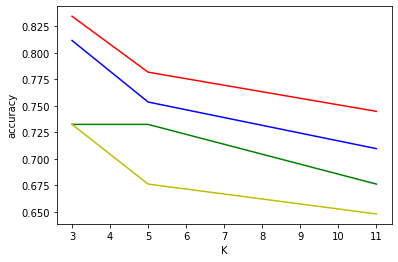

In [7]:
### 문제 1 ###
## 코드 작성 ##
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
classifier1_1 = KNeighborsClassifier(n_neighbors=3, metric="manhattan")         # #_1은 manhattan metric, #_2는 euclidean metric을 사용하고, 1_#은 k=3, 2_#은 k=5, 3_#은 k=11를 사용하였다
classifier1_1.fit(X_train, y_train)

classifier1_2 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
classifier1_2.fit(X_train, y_train)

classifier2_1 = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
classifier2_1.fit(X_train, y_train)

classifier2_2 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier2_2.fit(X_train, y_train)

classifier3_1 = KNeighborsClassifier(n_neighbors=11, metric="manhattan")
classifier3_1.fit(X_train, y_train)

classifier3_2 = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
classifier3_2.fit(X_train, y_train)

predict1_1_train = classifier1_1.score(X_train, y_train)
predict1_2_train = classifier1_2.score(X_train, y_train)
predict2_1_train = classifier2_1.score(X_train, y_train)
predict2_2_train = classifier2_2.score(X_train, y_train)
predict3_1_train = classifier3_1.score(X_train, y_train)
predict3_2_train = classifier3_2.score(X_train, y_train)

predict1_1 = classifier1_1.score(X_val, y_val)
predict1_2 = classifier1_2.score(X_val, y_val)
predict2_1 = classifier2_1.score(X_val, y_val)
predict2_2 = classifier2_2.score(X_val, y_val)
predict3_1 = classifier3_1.score(X_val, y_val)
predict3_2 = classifier3_2.score(X_val, y_val)

K = [3, 5, 11]
predict_k_1_train = [predict1_1_train, predict2_1_train, predict3_1_train]
predict_k_1 = [predict1_1, predict2_1, predict3_1]

predict_k_2_train = [predict1_2_train, predict2_2_train, predict3_2_train]
predict_k_2 = [predict1_2, predict2_2, predict3_2]

plt.figure()
plt.plot(K, predict_k_1_train, label='train accuracy_k_1', color='r')
plt.plot(K, predict_k_1, label='val accuracy_k_1', color='g')
plt.plot(K, predict_k_2_train, label='train accuracy_k_2', color='b')
plt.plot(K, predict_k_2, label='val accuracy_k_2', color='y')
plt.xlabel('K')
plt.ylabel('accuracy')

score_list = [predict1_1, predict1_2, predict2_1, predict2_2, predict3_1, predict3_2]
score_list_name = ['classifier1_1', 'classifier1_2', 'classifier2_1', 'classifier2_2', 'classifier3_1', 'classifier3_2']
i = score_list.index(max(score_list))
print(score_list, score_list.index(max(score_list)))

str = score_list_name[i] + '.score(X_test, y_test)'
exec("a = " + str)
print("test acc = ")
print(a)



**설명 작성**  
- 최적의 파라미터: 현재 런타임 상으로는 k=11, metric=manhattan
- 설명: k=3, 5, 11과 metric=manhatton, euuclidean마다 train과 val의 acc을 구하고 그 중 val의 acc이 가장 높은 값을 가지게 하는 파라미터로 test를 사용하였다
이 글을 작성시의 런타임에서는 k=11, metric=manhattan 방식일 때 val이 가장 높았고 그때의 test acc는 0.6478..이 나왔다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


[0.6901408450704225, 0.5211267605633803, 0.7323943661971831, 0.676056338028169, 0.6901408450704225, 0.7323943661971831] 2
test acc = 
0.7605633802816901


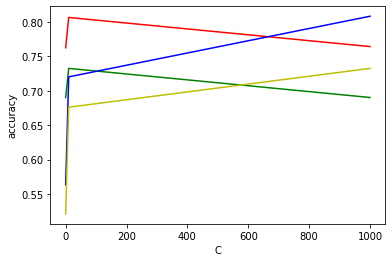

In [8]:
### 문제 2 ###
## 코드 작성 ##
import matplotlib.pyplot as plt
from sklearn import svm
classifier1_1 = svm.SVC(kernel='linear', C=0.01)        # #_1은 linear, #_2는 poly를 사용하고, 1_#은 C=0.01, 2_#은 C=10, 3_#은 C=1000를 사용하였다
classifier1_1.fit(X_train, y_train)

classifier1_2 = svm.SVC(kernel='poly', C=0.01) 
classifier1_2.fit(X_train, y_train)

classifier2_1 = svm.SVC(kernel='linear', C=10) 
classifier2_1.fit(X_train, y_train)

classifier2_2 = svm.SVC(kernel='poly', C=10) 
classifier2_2.fit(X_train, y_train)

classifier3_1 = svm.SVC(kernel='linear', C=1000) 
classifier3_1.fit(X_train, y_train)

classifier3_2 = svm.SVC(kernel='poly', C=1000) 
classifier3_2.fit(X_train, y_train)

predict1_1_train = classifier1_1.score(X_train, y_train)
predict1_2_train = classifier1_2.score(X_train, y_train)
predict2_1_train = classifier2_1.score(X_train, y_train)
predict2_2_train = classifier2_2.score(X_train, y_train)
predict3_1_train = classifier3_1.score(X_train, y_train)
predict3_2_train = classifier3_2.score(X_train, y_train)

predict1_1 = classifier1_1.score(X_val, y_val)
predict1_2 = classifier1_2.score(X_val, y_val)
predict2_1 = classifier2_1.score(X_val, y_val)
predict2_2 = classifier2_2.score(X_val, y_val)
predict3_1 = classifier3_1.score(X_val, y_val)
predict3_2 = classifier3_2.score(X_val, y_val)

C = [0.01, 10, 1000]
predict_t_1_train = [predict1_1_train, predict2_1_train, predict3_1_train]
predict_t_1 = [predict1_1, predict2_1, predict3_1]

predict_t_2_train = [predict1_2_train, predict2_2_train, predict3_2_train]
predict_t_2 = [predict1_2, predict2_2, predict3_2]

plt.figure()
plt.plot(C, predict_t_1_train, label='train accuracy_t_1', color='r')
plt.plot(C, predict_t_1, label='val accuracy_t_1', color='g')
plt.plot(C, predict_t_2_train, label='train accuracy_t_2', color='b')
plt.plot(C, predict_t_2, label='val accuracy_t_2', color='y')
plt.xlabel('C')
plt.ylabel('accuracy')

score_list = [predict1_1, predict1_2, predict2_1, predict2_2, predict3_1, predict3_2]
score_list_name = ['classifier1_1', 'classifier1_2', 'classifier2_1', 'classifier2_2', 'classifier3_1', 'classifier3_2']
i = score_list.index(max(score_list))
print(score_list, score_list.index(max(score_list)))

str = score_list_name[i] + '.score(X_test, y_test)'
exec("a = " + str)
print("test acc = ")
print(a)



**설명 작성**  
- 최적의 파라미터:
- 설명:



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

[0.6776574803149606, 0.7246186023622048, 0.7386934055118111] 2
test acc = 
0.7464788732394366


Text(0, 0.5, 'accuracy')

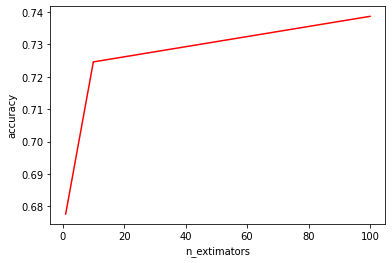

In [12]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #랜덤 포레스트의 하이퍼 파라미터로 n_estimator를 변화시켰으며, clf1은 1 estimator, clf2는 10e estimators, clf3는 100 estimators이다

clf1 = RandomForestClassifier(n_estimators=1)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = RandomForestClassifier(n_estimators=100)

clfs = [clf1, clf2, clf3]
scores = []

for i in clfs:
  a = np.mean(cross_val_score(i, X_train, y_train, cv=KFold(5)))
  scores.append(a)

i = scores.index(max(scores))
print(scores, scores.index(max(scores)))
score_list_name = ['clf1', 'clf2', 'clf3']

str1 = score_list_name[i] + '.fit(X_train, y_train)'
str2 = score_list_name[i] + '.score(X_test, y_test)'
exec(str1)
exec("a = " + str2)
print("test acc = ")
print(a)

n = [1, 10, 100]
plt.figure()
plt.plot(n, scores, label='acc', color='r')
plt.xlabel('n_extimators')
plt.ylabel('accuracy')





**설명 작성**  
- test accuracy:
- 최적의 파라미터:
- 설명:



[0.6635367762128326, 0.7104851330203443, 0.7276995305164319] 2
test acc = 
0.8450704225352113


Text(0, 0.5, 'accuracy')

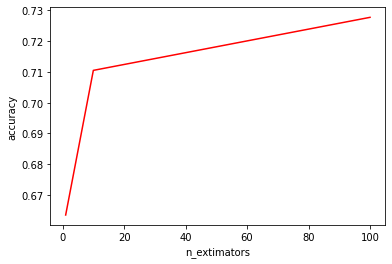

In [10]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut
import numpy as np

clf1 = RandomForestClassifier(n_estimators=1)
clf2 = RandomForestClassifier(n_estimators=10)
clf3 = RandomForestClassifier(n_estimators=100)

clfs = [clf1, clf2, clf3]
scores = []

for i in clfs:
  a = np.mean(cross_val_score(i, X_train, y_train, cv=LeaveOneOut()))
  scores.append(a)

i = scores.index(max(scores))
print(scores, scores.index(max(scores)))
score_list_name = ['clf1', 'clf2', 'clf3']

str1 = score_list_name[i] + '.fit(X_train, y_train)'
str2 = score_list_name[i] + '.score(X_test, y_test)'
exec(str1)
exec("a = " + str2)
print("test acc = ")
print(a)

n = [1, 10, 100]
plt.figure()
plt.plot(n, scores, label='acc', color='r')
plt.xlabel('n_extimators')
plt.ylabel('accuracy')





**설명 작성**  
- test accuracy:
- 최적의 파라미터:
- 설명:



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [15]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [16]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [17]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [18]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

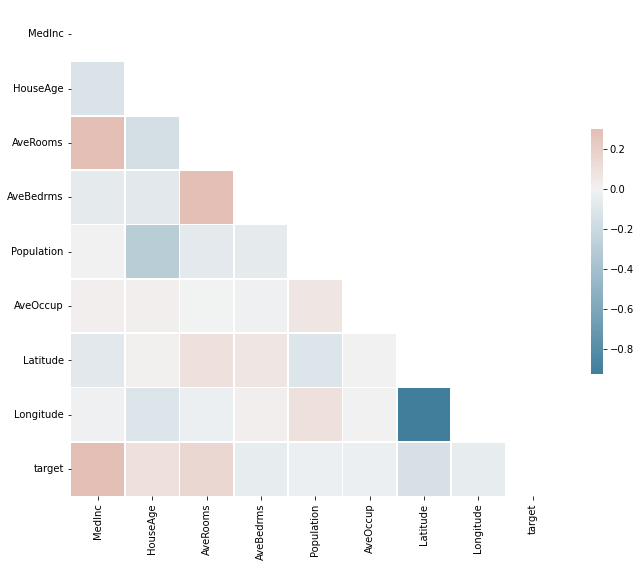

In [20]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import matplotlib.pyplot as plt
import seaborn as sns
# correlation matrix 계산하기
corr = df.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(11, 9))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


- **Feature들 간 관계 서술**  
  답: 

- **최종 선택한 feature들**  
  답: 

In [ ]:
### 문제 4-1 ###
# 새 dataframe 만들기 

### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [ ]:
### 문제 4-2 ###
## 코드 작성 ##

**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: 

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
### 문제 4-3 ###
## 코드 작성 ##

In [ ]:
### 문제 4-3 ###
## 그래프 작성 ##

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [ ]:
### 문제 4-3 ###
# 최종 결과 출력